Сначала у тебя есть 2 значения: Мат ожидание и СКО

И есть 2 формулы (плотность распределения и функция распределения)

Иксы от 0 до 100 или любые 100 рандомных значений

По формулам находишь значения и строишь графики

Потом (такое есть в Экселе) надо зарандомить 100 значений по мат ожиданию и СКО

И построить по значениям гистограмму (простую) и как в первой лабе график с относительной частотой

Ну и там и там найти значения статистик тоже как в первой лабе

И сравнить графики по формуле и рандому

In [1]:
import numpy as np
import statistics as st
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# константы
n = 100             # объём выборки
mean = 6            # мат ожидание
std = 2             # СКО

random_arr = np.random.normal(mean, std, n)
random_arr.sort()                           # вариационный ряд
r_arr_pdf = norm.pdf(random_arr, mean, std) # плотность распределения
r_arr_cdf = norm.cdf(random_arr, mean, std) # функция распределения

# ТЕОРИТИЧЕСКАЯ ЧАСТЬ

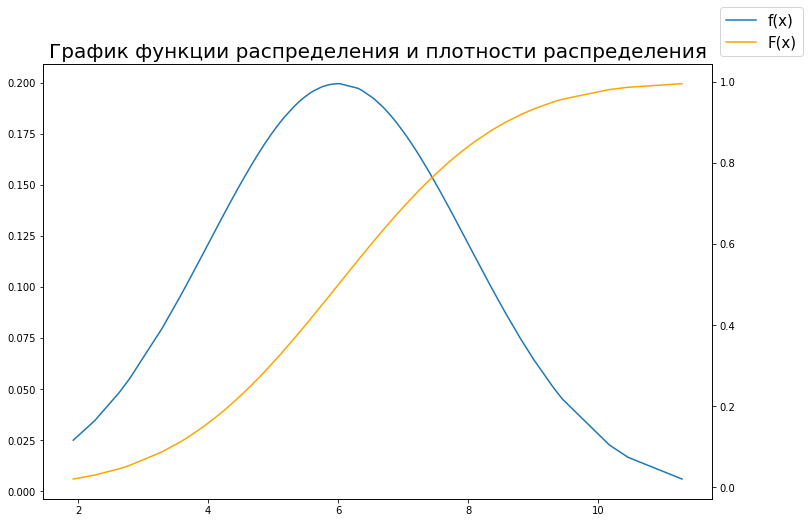

In [3]:
# создадим сетку из одной ячейки
fig, ax_left = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax_right = ax_left.twinx()

# на правой оси y построим график функции распределения
ax_right.plot(random_arr, r_arr_cdf, color='orange', label='F(x)')

# на левой оси y построим график плотности распределения
ax_left.plot(random_arr, r_arr_pdf, label='f(x)')

fig.legend(loc='lower left',
           bbox_to_anchor=(1, 1),
           bbox_transform=ax_right.transAxes,
           prop={'size': 15})
ax_left.set_title('График функции распределения и плотности распределения', size=20)

plt.show()

## Основные статистики(теор. часть)

In [4]:
total = np.sum(random_arr)                               # сумма
median = np.median(random_arr)                           # медиана
var = np.var(random_arr)                                 # дисперсия
asd = np.std(random_arr)                                 # среднеквадратичное отклонение
mse = np.sqrt(asd)/n                                     # cреднеквадратичная ошибка
r_arr_min = np.min(random_arr)                           # минимум
r_arr_max = np.max(random_arr)                           # максимум
uq = np.quantile(random_arr, 0.75)                       # верхний квантиль
lq = np.quantile(random_arr, 0.25)                       # нижний квантиль
coef_asym = skew(random_arr, axis=0, bias=True)          # коэффициент асимметрии
coef_kurtosis = kurtosis(random_arr, axis=0, bias=True)  # коэффициент эксцесса

print(f'Вариационный ряд = {random_arr}')
print(f'Сумма = {total}')
print(f'Медиана = {median}')
print(f'Дисперсия = {var}')
print(f'Стандартное отклонение = {asd}')
print(f'Среднеквадратичная ошибка = {mse}')
print(f'Минимум = {r_arr_min}')
print(f'Максимум = {r_arr_max}')
print(f'Размах = {r_arr_max - r_arr_min}')
print(f'Верхний квантиль = {uq}')
print(f'Нижний квантиль = {lq}')
print(f'Межквантильный размах = {uq - lq}')
print(f'Коэф. ассиметрии = {coef_asym}')
print(f'Коэф. эксцесса = {coef_kurtosis}')

Вариационный ряд = [ 1.92749925  2.25616149  2.63322651  2.78919311  3.29094931  3.56287237
  3.5841626   3.64045613  3.71417296  3.91241355  3.93452805  4.08307401
  4.09128058  4.20993933  4.27325001  4.32818909  4.41527305  4.51174044
  4.64746745  4.73861095  4.73884413  4.76822031  4.78640135  4.86082218
  4.9111179   4.95334449  4.97469167  5.05743966  5.06103006  5.11651038
  5.1346634   5.16928919  5.32043452  5.39627279  5.47516978  5.56271201
  5.61421657  5.62683651  5.74588037  5.74995842  5.77124777  5.77332451
  5.86042002  5.96424361  6.01943516  6.02300511  6.02477424  6.30164308
  6.3402709   6.35985153  6.53777154  6.54843357  6.66701314  6.68990262
  6.69419263  6.72121036  6.78692049  6.81937911  6.84115271  6.90698677
  7.04086055  7.04091792  7.04539866  7.15774581  7.16455794  7.21161005
  7.22676598  7.23732027  7.26116961  7.2643134   7.39059588  7.5632665
  7.70324604  7.79721247  7.81842875  7.8399212   7.92513824  7.92546888
  7.95415318  8.00444871  8.00603

ValueError: Automatic legend placement (loc='best') not implemented for figure legend

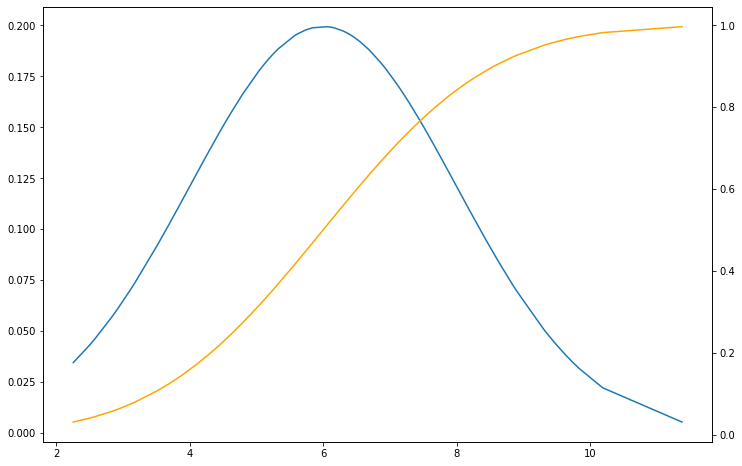

In [45]:
# Теоретическая часть
x1 = np.random.normal(mean, std, n)
x1.sort()                 # вариационный ряд нормального распределения
y1_pdf = norm.pdf(x1, mean, std)                         # плотность распределения
y1_cdf = norm.cdf(x1, mean, std)                         # функция распределения

# возникает проблема: по оси y разный масштаб
# проблему можно решить через функции subplots() и twinx()
# создадим сетку из одной ячейки
fig, ax_left = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

# создадим новую ось с правой стороны
ax_right = ax_left.twinx()

# на правой оси y построим график функции распределения
ax_right.plot(x1, y1_cdf, color='orange', label='F(x)')

# на левой оси y построим график плотности распределения
ax_left.plot(x1, y1_pdf, label='f(x)')

fig.legend(loc=0,
           bbox_to_anchor=(1, 1),
           bbox_transform=ax_right.transAxes,
           prop={'size': 15})
plt.show()

sum_of = np.sum(x1)                                 # сумма
median = np.median(x1)                           # медиана
var = np.var(x1)                                 # дисперсия
asd = np.std(x1)                                 # среднее квадратичное отклонение
mse = np.sqrt(asd)/n                             # cредняя квадратичная ошибка
min = np.min(x1)                                 # минимум
max = np.max(x1)                                 # максимум
uq = np.quantile(x1, 0.75)                       # верхний квантиль
lq = np.quantile(x1, 0.25)                       # нижний квантиль
coef_asym = skew(x1, axis=0, bias=True)          # коэффициент асимметрии
coef_kurtosis = kurtosis(x1, axis=0, bias=True)  # коэффициент эксцесса

print(f"\nВариационный ряд:\n{x1}\n")
print(f"+---------------------------------------------------------------------------+\n"
      f"|                               Основные статистики                         |\n"
      f"+---------------------------------------------------------------------------+\n"
      f"Объём выборки = {n}")
print(f"Выборочное среднее = {1/n * sum}")
print(f"Медиана = {median}")
print(f"Выборочная дисперсия = {var}")
print(f"Выборочное среднее квадратичное отклонение = {asd}")
print(f"Средняя квадратичная ошибка = {mse}")
print(f"Минимум = {min}")
print(f"Максимум = {max}")
print(f"Размах выборки = {max - min}")
print(f"Верхний квантиль = {uq}")
print(f"Нижний квантиль = {lq}")
print(f"IQR = {uq - lq}")
print(f"Коэффициент асимметрии = {coef_asym}")
print(f"Коэффициент эксцесса = {coef_kurtosis}\n"
      f"+---------------------------------------------------------------------------+")



# Практическая часть

x2 = np.round(np.random.normal(mean, std, n))           # вариационный ряд нормального распределения
x2.sort()
y2_pdf = norm.pdf(x2, mean, std)                        # плотность распределения
y2_cdf = norm.cdf(x2, mean, std)                        # функция распределения

# гистограмма по частоте
bins = list(np.arange(np.min(x2), np.max(x2) + 0.2, 1.0))
plt.hist(x2, bins = bins, color ='lightgreen', edgecolor ='black', rwidth = 0.9)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма по частоте')
plt.tight_layout()
plt.show()

# график эмперической функции
ecdf = ECDF(x2)
plt.plot(ecdf.x, ecdf.y, marker = '.', linestyle='dotted')
# sns.kdeplot(x2, cumulative=True)
plt.ylabel('$F(x)$', fontsize = 20)
plt.xlabel('$x$', fontsize = 20)
plt.tight_layout()
plt.show()

sum = np.sum(x2)                                 # сумма
median = np.median(x2)                           # медиана
var = np.var(x2)                                 # дисперсия
asd = np.std(x2)                                 # среднее квадратичное отклонение
mse = np.sqrt(asd)/n                             # cредняя квадратичная ошибка
min = np.min(x2)                                 # минимум
max = np.max(x2)                                 # максимум
uq = np.quantile(x2, 0.75)                       # верхний квантиль
lq = np.quantile(x2, 0.25)                       # нижний квантиль
coef_asym = skew(x2, axis=0, bias=True)          # коэффициент асимметрии
coef_kurtosis = kurtosis(x2, axis=0, bias=True)  # коэффициент эксцесса

print(f"\nВариационный ряд:\n{x2}\n")
print(f"+---------------------------------------------------------------------------+\n"
      f"|                               Основные статистики                         |\n"
      f"+---------------------------------------------------------------------------+\n"
      f"Объём выборки = {n}")
print(f"Выборочное среднее = {1/n * sum}")
print(f"Медиана = {median}")
print(f"Выборочная дисперсия = {var}")
print(f"Выборочное среднее квадратичное отклонение = {asd}")
print(f"Средняя квадратичная ошибка = {mse}")
print(f"Минимум = {min}")
print(f"Максимум = {max}")
print(f"Размах выборки = {max - min}")
print(f"Верхний квантиль = {uq}")
print(f"Нижний квантиль = {lq}")
print(f"IQR = {uq - lq}")
print(f"Коэффициент асимметрии = {coef_asym}")
print(f"Коэффициент эксцесса = {coef_kurtosis}\n"
      f"+---------------------------------------------------------------------------+")



# Сравнение результатов

plt.plot(x1, y1_pdf * n, color='r', label='f(x)')
bins = list(np.arange(np.min(x2), np.max(x2) + 0.2, 1.0))
plt.hist(x2, bins = bins, color ='lightgreen', edgecolor ='black', rwidth = 0.9)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.legend()
plt.show()



ecdf = ECDF(x2)
plt.plot(ecdf.x, ecdf.y, marker = '.', linestyle='dotted')
sns.kdeplot(x1, cumulative=True)
plt.ylabel('$F(x)$', fontsize = 20)
plt.xlabel('$x$', fontsize = 20)
plt.tight_layout()
plt.show()

